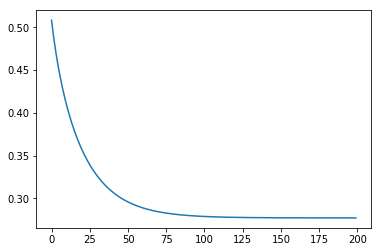

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L1 = []
L2 = []

"""
    计算代价函数
    X:样本矩阵(m行n列,代表m个样本,n种特征,且第1列全为1)
    Y:结果向量(m行1列)
    Theta:参数向量(n行1列)
"""
def cost(X, Y, Theta):
    m = len(Y)
    return np.dot(np.transpose((np.dot(X, Theta) - Y)) , np.dot(X, Theta) - Y) / (2 * m)


"""
    梯度下降
    X:样本矩阵(m行n列,代表m个样本,n种特征,且第1列全为1)
    Y:结果向量(m行1列)
    Theta:参数向量(n行1列)
    rate:梯度下降的学习速率
    rounds:训练轮次
"""
def gradient_descent(X, Y, Theta, rate, rounds):
    m = len(Y)
    for i in range(rounds):
        H = np.dot(X, Theta)  # 计算X和Theta的内积，得到假设函数

        Theta = Theta - rate * np.dot(np.transpose(X), (H - Y)) / m
        # print(i, cost(X, Y, Theta)) # 打印轮次，以及cost
        L1.append(i)
        L2.extend(cost(X, Y, Theta).tolist()[0])

    return Theta


"""
    获取feature归一化矩阵，保证梯度下降能正确运行的关键
    X:样本矩阵(m行n列)
    type:需要转化成的数据类型(至少是小数)(如果直接改变X.dtype=np.double, 那么甚至会改变矩阵维度!)
"""
def get_normalize(X, dtype=np.double):
    A = X.astype(dtype)
    AVG = np.mean(A, axis=0)  # 对每一列求均值 0代表列axis 得到1行n列的向量
    SCALE = np.max(A, 0) - np.min(A, 0)  # 得到每一列的标准差 1行n列

    for j in range(len(SCALE)):
        if SCALE[j] == 0 :
            SCALE[j] = 1

    for i in range(A.shape[0]):
        A[i] = (A[i] - AVG) / SCALE

    return A


"""
    返回1列1加上样本矩阵的矩阵
"""
def get_expand(X):
    return np.column_stack((np.ones(X.shape[0]), X))


# 这是我的一个样本矩阵
Sample = np.array([[-1.03195891,  0.23518549, -1.35234796,  0.02261405]
 ,[ 0.2251781,   0.38458126, -0.82112183, -0.45590376]
 ,[-0.26084638,  0.76745468,  1.37185829,  0.4616571 ]
 ,[-0.85392532,  0.68943455,  1.14351473, -1.61432955]
 ,[-0.58099815,  0.54726695, -0.4415547,   0.30180544]
 ,[-0.22906213, -0.92907942, -0.36993981,  0.79228911]
 ,[-1.86498173,  1.83115866,  1.33473245,  0.28793908]
 ,[-0.16383562, 1.31778854,  0.62201885,  0.14731821]
 ,[-1.45607431,  0.04415888, -1.44388017 , 1.04557269]
 ,[-0.71018991,  0.16178233, -0.06282129 , 1.52849349]]
)

# 这是我的一个结果向量
Label = np.array([[-2.18041982]
 ,[-1.31358836]
 ,[-1.07319437]
 ,[ 1.1548506 ]
 ,[-1.45696292]
 ,[ 0.18137457]
 ,[ 0.06278578]
 ,[-0.53260089]
 ,[-0.08498523]
 ,[ 0.97635466]]
)

# 这是我的参数向量,默认初始值都是0,5
T = np.full((5, 1), 0.5, dtype=np.double)
S = get_expand(get_normalize(Sample)) # 对样本矩阵进行归一化然后扩展

# 进行梯度下降
gradient_descent(S, Label, Theta=T, rate=1, rounds=200)

# 绘制代价函数下降曲线
plt.plot(L1, L2)
plt.show()